In [2]:
import matplotlib.pyplot as plt
import requests
import pandas as pd

In [3]:
def descargar_csv_desde_url(url, destino):
    try:
        # Realizar la solicitud GET a la URL
        respuesta = requests.get(url, verify=True)
        
        # Verificar si la solicitud fue exitosa (código de estado 200)
        if respuesta.status_code == 200:
            # Abrir un archivo local en modo escritura binaria
            with open(destino, 'wb') as archivo_local:
                # Escribir el contenido de la respuesta en el archivo local
                archivo_local.write(respuesta.content)
            print(f"Archivo CSV descargado exitosamente en: {destino}")
        else:
            print(f"Error al descargar el archivo. Código de estado: {respuesta.status_code}")
    except Exception as e:
        print(f"Error: {e}")

## Hipotecas. Anuales-Hipotecas constituidas sobre el total de fincas por naturaleza de la finca.
https://www.ine.es/jaxiT3/Tabla.htm?t=3223&L=0

In [6]:
hipotecas_anuales = "https://www.ine.es/jaxiT3/files/t/es/csv_bdsc/3223.csv"
hipotecas_anuales_destino = "C:/Users/jorge/OneDrive/Escritorio/Master/TFM/hipotecas_anuales.csv"
descargar_csv_desde_url(hipotecas_anuales, hipotecas_anuales_destino)

Archivo CSV descargado exitosamente en: C:/Users/jorge/OneDrive/Escritorio/Master/TFM/hipotecas_anuales.csv


In [7]:
hipotecas_anuales_destino_df = pd.read_csv(hipotecas_anuales_destino, sep=';', header= 'infer')

In [8]:
hipotecas_anuales_destino_df.columns

Index(['Comunidades y Ciudades Autónomas', 'Naturaleza de la finca',
       'Número e importe', 'Periodo', 'Total'],
      dtype='object')

In [9]:
hipotecas_anuales_destino_df = hipotecas_anuales_destino_df.rename(columns={'Comunidades y Ciudades Autónomas': 'CCAA'})

In [10]:
hipotecas_anuales_destino_df = hipotecas_anuales_destino_df.rename(columns=lambda x: x.replace(' ', '_'))
hipotecas_anuales_destino_df = hipotecas_anuales_destino_df.replace(' ', '_', regex=True)
hipotecas_anuales_destino_df['Total'] = hipotecas_anuales_destino_df['Total'].str.replace('.', '', regex=False)

In [11]:
hipotecas_anuales_destino_df

,CCAA,Naturaleza_de_la_finca,Número_e_importe,Periodo,Total
0,Total_Nacional,Total_fincas,Número_de_hipotecas,2023,497224
1,Total_Nacional,Total_fincas,Número_de_hipotecas,2022,608656
2,Total_Nacional,Total_fincas,Número_de_hipotecas,2021,558210
3,Total_Nacional,Total_fincas,Número_de_hipotecas,2020,466580
4,Total_Nacional,Total_fincas,Número_de_hipotecas,2019,497720
...,...,...,...,...,...
4195,19_Melilla,Otros,Importe_de_hipotecas,2007,NaN
4196,19_Melilla,Otros,Importe_de_hipotecas,2006,NaN
4197,19_Melilla,Otros,Importe_de_hipotecas,2005,NaN
4198,19_Melilla,Otros,Importe_de_hipotecas,2004,NaN


In [12]:
condicion_1 = hipotecas_anuales_destino_df['CCAA'] == "Total_Nacional"
condicion_3 = hipotecas_anuales_destino_df['Naturaleza_de_la_finca'] == "Total_fincas"
condicion_2 = hipotecas_anuales_destino_df['Número_e_importe'] == "Número_de_hipotecas"

In [13]:
hipotecas_anuales_destino_df_num = hipotecas_anuales_destino_df.loc[(condicion_1)&(condicion_2)&(condicion_3)]

In [14]:
hipotecas_anuales_destino_df_num['Total'] = hipotecas_anuales_destino_df_num['Total'].astype(int).copy()

C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\2696651039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hipotecas_anuales_destino_df_num['Total'] = hipotecas_anuales_destino_df_num['Total'].astype(int).copy()


In [15]:
hipotecas_anuales_destino_df_num.head(30)

,CCAA,Naturaleza_de_la_finca,Número_e_importe,Periodo,Total
0,Total_Nacional,Total_fincas,Número_de_hipotecas,2023,497224
1,Total_Nacional,Total_fincas,Número_de_hipotecas,2022,608656
2,Total_Nacional,Total_fincas,Número_de_hipotecas,2021,558210
3,Total_Nacional,Total_fincas,Número_de_hipotecas,2020,466580
4,Total_Nacional,Total_fincas,Número_de_hipotecas,2019,497720
5,Total_Nacional,Total_fincas,Número_de_hipotecas,2018,481848
6,Total_Nacional,Total_fincas,Número_de_hipotecas,2017,432952
7,Total_Nacional,Total_fincas,Número_de_hipotecas,2016,400873
8,Total_Nacional,Total_fincas,Número_de_hipotecas,2015,371981
9,Total_Nacional,Total_fincas,Número_de_hipotecas,2014,315535


In [16]:
columna_a = hipotecas_anuales_destino_df_num['Total']
columna_b = hipotecas_anuales_destino_df_num['Periodo']

Text(0.5, 1.0, 'Número de Hipotecas')

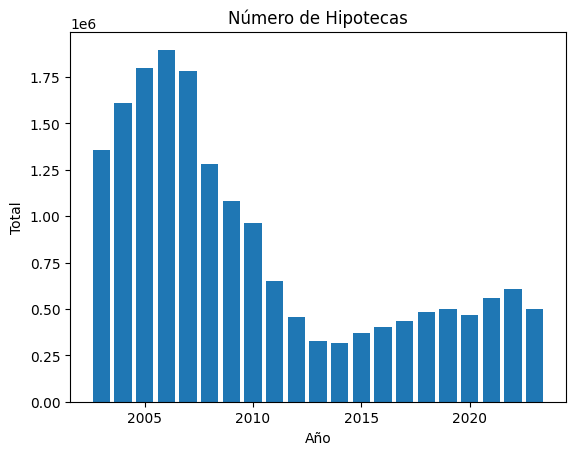

In [17]:
plt.bar(columna_b, columna_a)
plt.xlabel('Año')
plt.ylabel('Total')
plt.title('Número de Hipotecas')


In [18]:
condicion_1 = hipotecas_anuales_destino_df['CCAA'] == "Total_Nacional"
condicion_3 = hipotecas_anuales_destino_df['Naturaleza_de_la_finca'] == "Total_fincas"
condicion_2 = hipotecas_anuales_destino_df['Número_e_importe'] == "Importe_de_hipotecas"

In [19]:
hipotecas_anuales_destino_df_imp = hipotecas_anuales_destino_df.loc[(condicion_1)&(condicion_2)&(condicion_3)]
hipotecas_anuales_destino_df_imp['Total'] = hipotecas_anuales_destino_df_imp['Total'].astype(int).copy()

C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\963545008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hipotecas_anuales_destino_df_imp['Total'] = hipotecas_anuales_destino_df_imp['Total'].astype(int).copy()


In [20]:
hipotecas_anuales_destino_df_imp

,CCAA,Naturaleza_de_la_finca,Número_e_importe,Periodo,Total
21,Total_Nacional,Total_fincas,Importe_de_hipotecas,2023,82359859
22,Total_Nacional,Total_fincas,Importe_de_hipotecas,2022,96350118
23,Total_Nacional,Total_fincas,Importe_de_hipotecas,2021,82541078
24,Total_Nacional,Total_fincas,Importe_de_hipotecas,2020,70054869
25,Total_Nacional,Total_fincas,Importe_de_hipotecas,2019,73716908
26,Total_Nacional,Total_fincas,Importe_de_hipotecas,2018,69483231
27,Total_Nacional,Total_fincas,Importe_de_hipotecas,2017,61264688
28,Total_Nacional,Total_fincas,Importe_de_hipotecas,2016,53610362
29,Total_Nacional,Total_fincas,Importe_de_hipotecas,2015,48936163
30,Total_Nacional,Total_fincas,Importe_de_hipotecas,2014,41097804


In [21]:
valores_y = hipotecas_anuales_destino_df_imp['Total']
valores_x = hipotecas_anuales_destino_df_imp['Periodo']

Text(0.5, 1.0, 'Importe de Hipotecas')

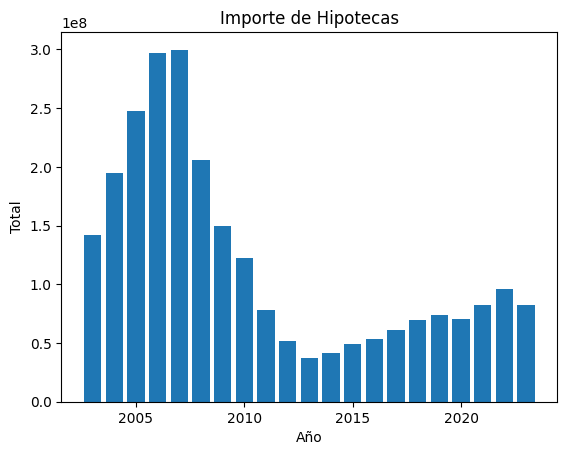

In [22]:
plt.bar(valores_x, valores_y)
plt.xlabel('Año')
#plt.xticks(valores_x) plt.xticks(x, values)
plt.ylabel('Total')
plt.title('Importe de Hipotecas')

## Tipo de interés medio al inicio de las hipotecas constituidas

In [23]:
tip_int = "https://www.ine.es/jaxiT3/files/t/es/csv_bdsc/24457.csv" 
tip_int_destino = "C:/Users/jorge/OneDrive/Escritorio/Master/TFM/hipotecas_anuales.csv"
descargar_csv_desde_url(tip_int, tip_int_destino)

Archivo CSV descargado exitosamente en: C:/Users/jorge/OneDrive/Escritorio/Master/TFM/hipotecas_anuales.csv


In [24]:
tip_int_df = pd.read_csv(tip_int_destino, sep=';', header= 'infer')

In [25]:
tip_int_df['Año'] = tip_int_df['Periodo'].str.slice(start=0, stop=4)
tip_int_df['Mes'] = tip_int_df['Periodo'].str.slice(start=5, stop=7)
tip_int_df['Total'] = tip_int_df['Total'].str.replace(',', '.', regex=False)
tip_int_df['Total'] = tip_int_df['Total'].astype(float)

In [26]:
tip_int_df

,Tipo de interés,Naturaleza de la finca,Periodo,Total,Año,Mes
0,Total,Total fincas,2024M01,3.91,2024,01
1,Total,Total fincas,2023M12,3.66,2023,12
2,Total,Total fincas,2023M11,3.66,2023,11
3,Total,Total fincas,2023M10,3.70,2023,10
4,Total,Total fincas,2023M09,3.42,2023,09
...,...,...,...,...,...,...
1081,Variable,Viviendas,2009M05,4.33,2009,05
1082,Variable,Viviendas,2009M04,4.47,2009,04
1083,Variable,Viviendas,2009M03,4.84,2009,03
1084,Variable,Viviendas,2009M02,5.17,2009,02


In [27]:
condicion_1 = (tip_int_df['Tipo de interés'] == 'Total')

In [28]:
tip_int_df_total = tip_int_df.loc[(condicion_1)]

In [29]:
tip_int_df_total

,Tipo de interés,Naturaleza de la finca,Periodo,Total,Año,Mes
0,Total,Total fincas,2024M01,3.91,2024,01
1,Total,Total fincas,2023M12,3.66,2023,12
2,Total,Total fincas,2023M11,3.66,2023,11
3,Total,Total fincas,2023M10,3.70,2023,10
4,Total,Total fincas,2023M09,3.42,2023,09
...,...,...,...,...,...,...
357,Total,Viviendas,2009M05,4.38,2009,05
358,Total,Viviendas,2009M04,4.50,2009,04
359,Total,Viviendas,2009M03,4.89,2009,03
360,Total,Viviendas,2009M02,5.20,2009,02


In [30]:
grupo = tip_int_df_total.groupby('Año')

In [31]:
grupo.head()

,Tipo de interés,Naturaleza de la finca,Periodo,Total,Año,Mes
0,Total,Total fincas,2024M01,3.91,2024,01
1,Total,Total fincas,2023M12,3.66,2023,12
2,Total,Total fincas,2023M11,3.66,2023,11
3,Total,Total fincas,2023M10,3.70,2023,10
4,Total,Total fincas,2023M09,3.42,2023,09
...,...,...,...,...,...,...
170,Total,Total fincas,2009M11,3.77,2009,11
171,Total,Total fincas,2009M10,3.84,2009,10
172,Total,Total fincas,2009M09,3.97,2009,09
173,Total,Total fincas,2009M08,3.97,2009,08


In [32]:
suma_por_ano = grupo['Total'].mean()

In [33]:
suma_por_ano

Año
2009    4.329583
2010    3.605417
2011    3.865417
2012    4.130417
2013    4.163333
2014    3.831250
2015    3.286667
2016    3.182500
2017    2.876250
2018    2.609583
2019    2.542083
2020    2.233333
2021    1.990417
2022    2.103750
2023    3.289167
2024    3.685000
Name: Total, dtype: float64

Text(0.5, 1.0, 'Total')

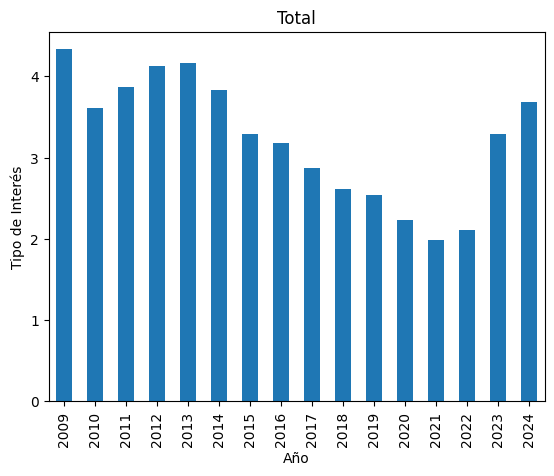

In [34]:
suma_por_ano.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Tipo de Interés')
plt.title('Total')

In [35]:
condicion_2 = (tip_int_df['Tipo de interés'] == 'Fijo')
tip_int_df_fijo = tip_int_df.loc[(condicion_2)]

In [36]:
grupo = tip_int_df_fijo.groupby('Año')
suma_por_ano = grupo['Total'].mean()

Text(0.5, 1.0, 'Fijo')

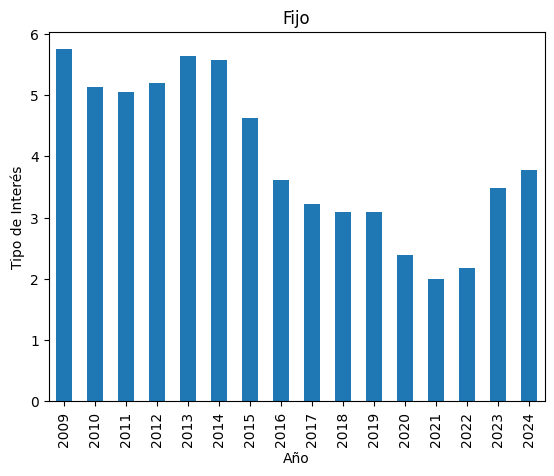

In [37]:
suma_por_ano.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Tipo de Interés')
plt.title('Fijo')

In [38]:
condicion_3 = (tip_int_df['Tipo de interés'] == 'Variable')
tip_int_df_variable = tip_int_df.loc[(condicion_3)]

In [39]:
grupo = tip_int_df_variable.groupby('Año')
suma_por_ano = grupo['Total'].mean()

Text(0.5, 1.0, 'Variable')

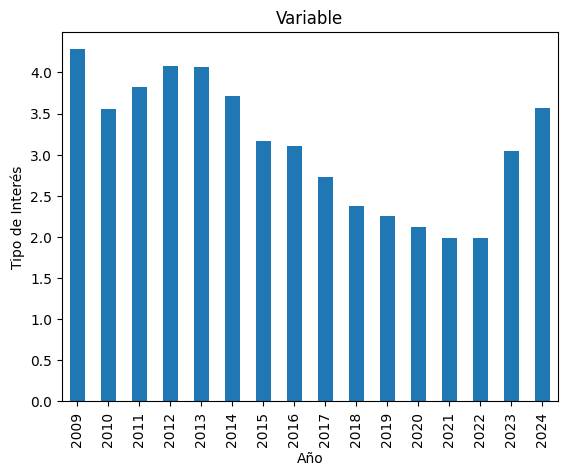

In [40]:
suma_por_ano.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Tipo de Interés')
plt.title('Variable')

## Producto Interior Bruto a precios de mercado

In [41]:
PIB ="https://www.ine.es/jaxiT3/files/t/es/csv_bdsc/30678.csv?nocab=1" 
PIB_destino = "C:/Users/jorge/OneDrive/Escritorio/Master/TFM/hipotecas_anuales.csv"
descargar_csv_desde_url(PIB , PIB_destino)
PIB_df = pd.read_csv(PIB_destino, sep=';', header= 'infer')

Archivo CSV descargado exitosamente en: C:/Users/jorge/OneDrive/Escritorio/Master/TFM/hipotecas_anuales.csv


In [42]:
PIB_df

,Tipo de dato,Agregados macroeconómicos: Nivel 1,Agregados macroeconómicos: Nivel 2,Niveles y tasas,Periodo,Total
0,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2023T4,385.409
1,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2023T3,360.186
2,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2023T2,366.637
3,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2023T1,349.657
4,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2022T4,360.022
...,...,...,...,...,...,...
11131,Datos ajustados de estacionalidad y calendario,Impuestos menos subvenciones sobre los productos,Subvenciones sobre los productos,Variación anual,1996T1,"4,9912"
11132,Datos ajustados de estacionalidad y calendario,Impuestos menos subvenciones sobre los productos,Subvenciones sobre los productos,Variación anual,1995T4,NaN
11133,Datos ajustados de estacionalidad y calendario,Impuestos menos subvenciones sobre los productos,Subvenciones sobre los productos,Variación anual,1995T3,NaN
11134,Datos ajustados de estacionalidad y calendario,Impuestos menos subvenciones sobre los productos,Subvenciones sobre los productos,Variación anual,1995T2,NaN


In [43]:
condicion_1 = (PIB_df['Niveles y tasas'] == 'Dato base')
condicion_2 = (PIB_df['Agregados macroeconómicos: Nivel 1'] == 'Producto interior bruto a precios de mercado')
PIB_df = PIB_df.loc[(condicion_1)&(condicion_2)]
PIB_df['Año'] = PIB_df['Periodo'].str.slice(start=0, stop=4)

C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\2617079421.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PIB_df['Año'] = PIB_df['Periodo'].str.slice(start=0, stop=4)


In [44]:
PIB_df

,Tipo de dato,Agregados macroeconómicos: Nivel 1,Agregados macroeconómicos: Nivel 2,Niveles y tasas,Periodo,Total,Año
0,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2023T4,385.409,2023
1,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2023T3,360.186,2023
2,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2023T2,366.637,2023
3,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2023T1,349.657,2023
4,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2022T4,360.022,2022
...,...,...,...,...,...,...,...
5679,Datos ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,1996T1,119.460,1996
5680,Datos ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,1995T4,117.799,1995
5681,Datos ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,1995T3,115.628,1995
5682,Datos ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,1995T2,114.401,1995


In [45]:
PIB_df.groupby('Año').head()

,Tipo de dato,Agregados macroeconómicos: Nivel 1,Agregados macroeconómicos: Nivel 2,Niveles y tasas,Periodo,Total,Año
0,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2023T4,385.409,2023
1,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2023T3,360.186,2023
2,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2023T2,366.637,2023
3,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2023T1,349.657,2023
4,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2022T4,360.022,2022
...,...,...,...,...,...,...,...
5664,Datos ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,1999T4,153.809,1999
5668,Datos ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,1998T4,143.999,1998
5672,Datos ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,1997T4,134.821,1997
5676,Datos ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,1996T4,124.949,1996


In [46]:
PIB_df['Año'] = PIB_df['Periodo'].str.slice(start=0, stop=4)
PIB_df['Año'] = PIB_df['Año'].astype(int)
condicion_1 = (PIB_df['Año'] > 2005)
PIB_df = PIB_df.loc[(condicion_1)]
PIB_df['Trimestre'] = PIB_df['Periodo'].str.slice(start=5, stop=7)
PIB_df['Total'] = PIB_df['Total'].str.replace('.', '', regex=False)
PIB_df['Total'] = PIB_df['Total'].astype(float)
grupo = PIB_df.groupby('Año')
suma_por_ano = grupo['Total'].mean() #Aquí va la suma, no la media


C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\834778176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PIB_df['Año'] = PIB_df['Periodo'].str.slice(start=0, stop=4)
C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\834778176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PIB_df['Año'] = PIB_df['Año'].astype(int)
C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\834778176.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [47]:
385409.0+360186.0+366637.0+349657.0

1461889.0

In [48]:
PIB_df

,Tipo de dato,Agregados macroeconómicos: Nivel 1,Agregados macroeconómicos: Nivel 2,Niveles y tasas,Periodo,Total,Año,Trimestre
0,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2023T4,385409.0,2023,4
1,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2023T3,360186.0,2023,3
2,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2023T2,366637.0,2023,2
3,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2023T1,349657.0,2023,1
4,Datos no ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2022T4,360022.0,2022,4
...,...,...,...,...,...,...,...,...
5635,Datos ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2007T1,263773.0,2007,1
5636,Datos ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2006T4,257766.0,2006,4
5637,Datos ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2006T3,253409.0,2006,3
5638,Datos ajustados de estacionalidad y calendario,Producto interior bruto a precios de mercado,NaN,Dato base,2006T2,249021.0,2006,2


Text(0.5, 1.0, 'Producto interior bruto a precios de mercado')

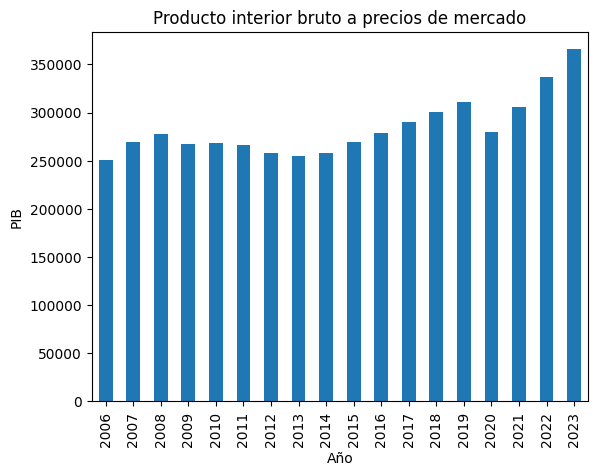

In [49]:
import matplotlib.pyplot as plt
suma_por_ano.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('PIB')
plt.title('Producto interior bruto a precios de mercado')

## Tasa de Desempleo

In [50]:
Desempleo = "https://www.ine.es/jaxiT3/files/tpx/es/csv_bdsc/29814.csv?nocab=1"
Desempleo_destino = "C:/Users/jorge/OneDrive/Escritorio/Master/TFM/hipotecas_anuales.csv"
descargar_csv_desde_url(Desempleo , Desempleo_destino)

Archivo CSV descargado exitosamente en: C:/Users/jorge/OneDrive/Escritorio/Master/TFM/hipotecas_anuales.csv


In [51]:
Desempleo_df = pd.read_csv(Desempleo_destino, sep=';', header= 'infer')
Desempleo_df['Total'] = Desempleo_df['Total'].str.replace(',', '.', regex=False)

In [52]:
Desempleo_df

,Sexo,Tipo de tasa,Personas sin y con discapacidad,año,Total
0,Ambos sexos,Actividad,Tasa: Total,2022,75.3
1,Ambos sexos,Actividad,Tasa: Total,2021,75.0
2,Ambos sexos,Actividad,Tasa: Total,2020,73.4
3,Ambos sexos,Actividad,Tasa: Total,2019,75.0
4,Ambos sexos,Actividad,Tasa: Total,2018,74.9
...,...,...,...,...,...
238,Mujeres,Paro,Tasa: Personas con discapacidad,2018,25.0
239,Mujeres,Paro,Tasa: Personas con discapacidad,2017,26.7
240,Mujeres,Paro,Tasa: Personas con discapacidad,2016,29.3
241,Mujeres,Paro,Tasa: Personas con discapacidad,2015,31.1


In [53]:
condicion_1 = (Desempleo_df['Sexo'] == 'Ambos sexos')
condicion_2 = (Desempleo_df['Personas sin y con discapacidad'] == 'Tasa: Total')
condicion_3 = (Desempleo_df['Tipo de tasa'] == 'Actividad')
Desempleo_df = Desempleo_df.loc[(condicion_1)&(condicion_2)&(condicion_3)]
Desempleo_df['Total'] = Desempleo_df['Total'].astype(float)
Desempleo_df['año'] = Desempleo_df['año'].astype(int)

C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\1866820137.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Desempleo_df['Total'] = Desempleo_df['Total'].astype(float)
C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\1866820137.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Desempleo_df['año'] = Desempleo_df['año'].astype(int)


In [54]:
Desempleo_df

,Sexo,Tipo de tasa,Personas sin y con discapacidad,año,Total
0,Ambos sexos,Actividad,Tasa: Total,2022,75.3
1,Ambos sexos,Actividad,Tasa: Total,2021,75.0
2,Ambos sexos,Actividad,Tasa: Total,2020,73.4
3,Ambos sexos,Actividad,Tasa: Total,2019,75.0
4,Ambos sexos,Actividad,Tasa: Total,2018,74.9
5,Ambos sexos,Actividad,Tasa: Total,2017,75.1
6,Ambos sexos,Actividad,Tasa: Total,2016,75.4
7,Ambos sexos,Actividad,Tasa: Total,2015,75.5
8,Ambos sexos,Actividad,Tasa: Total,2014,75.3


Text(0.5, 1.0, 'Tasa de desempleo')

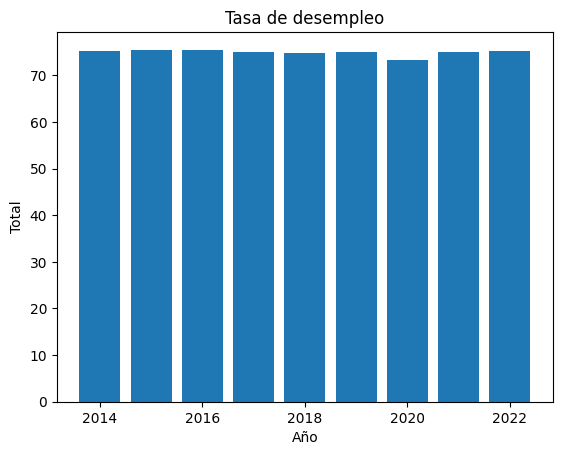

In [55]:
valores_x = Desempleo_df['año']
valores_y = Desempleo_df['Total']
plt.bar(valores_x, valores_y)
plt.xlabel('Año')
plt.ylabel('Total')
plt.title('Tasa de desempleo')

## Índice de Confianza empresarial

In [56]:
ICE = "https://www.ine.es/jaxiT3/files/t/es/csv_bdsc/8027.csv" 
ICE_destino = "C:/Users/jorge/OneDrive/Escritorio/Master/TFM/hipotecas_anuales.csv"
descargar_csv_desde_url(ICE , ICE_destino)

Archivo CSV descargado exitosamente en: C:/Users/jorge/OneDrive/Escritorio/Master/TFM/hipotecas_anuales.csv


In [57]:
ICE_df = pd.read_csv(ICE_destino, sep=';', header= 'infer')

In [58]:
ICE_df

,Total Nacional,Comunidades y Ciudades Autónomas,Principales indicadores,Periodo,Total
0,Total Nacional,NaN,Indice de confianza empresarial armonizado,2024T1,134
1,Total Nacional,NaN,Indice de confianza empresarial armonizado,2023T4,"133,2"
2,Total Nacional,NaN,Indice de confianza empresarial armonizado,2023T3,"135,9"
3,Total Nacional,NaN,Indice de confianza empresarial armonizado,2023T2,"132,5"
4,Total Nacional,NaN,Indice de confianza empresarial armonizado,2023T1,129
...,...,...,...,...,...
2425,Total Nacional,"17 Rioja, La",Expectativas del trimestre entrante,2014T1,"-32,5"
2426,Total Nacional,"17 Rioja, La",Expectativas del trimestre entrante,2013T4,"-28,2"
2427,Total Nacional,"17 Rioja, La",Expectativas del trimestre entrante,2013T3,"-34,1"
2428,Total Nacional,"17 Rioja, La",Expectativas del trimestre entrante,2013T2,"-41,2"


In [59]:
condicion_1 = (ICE_df['Total Nacional'] == 'Total Nacional')
condicion_2 = (ICE_df['Principales indicadores'] == 'Indice de confianza empresarial armonizado')
ICE_df = ICE_df.loc[(condicion_1)&(condicion_2)]
ICE_df['Año'] = ICE_df['Periodo'].str.slice(start=0, stop=4)
ICE_df['Año'] = ICE_df['Año'].astype(int)
ICE_df['Total'] = ICE_df['Total'].str.replace(',', '.', regex=False)
ICE_df['Total'] = ICE_df['Total'].astype(float)
grupo = ICE_df.groupby('Año')
suma_por_ano = grupo['Total'].mean() 

C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\1915790249.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICE_df['Año'] = ICE_df['Periodo'].str.slice(start=0, stop=4)
C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\1915790249.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ICE_df['Año'] = ICE_df['Año'].astype(int)
C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\1915790249.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Text(0.5, 1.0, 'Indice de confianza empresarial armonizado')

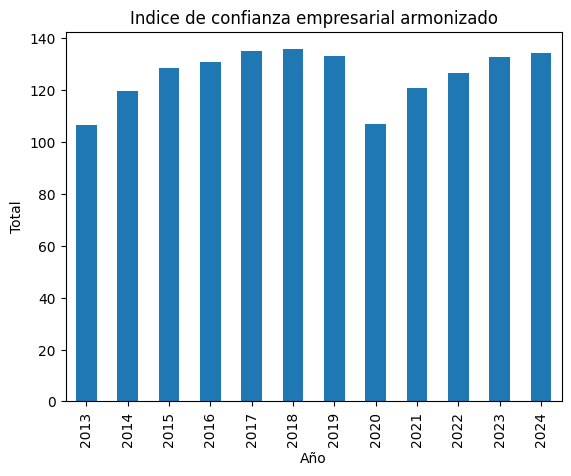

In [60]:
suma_por_ano.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Total')
plt.title('Indice de confianza empresarial armonizado')

## Índice de Precios de Consumo

In [62]:
#Probar el 50902
IPC = "https://www.ine.es/jaxiT3/files/t/es/csv_bdsc/50913.csv?nocab=1" 
IPC_destino = "C:/Users/jorge/OneDrive/Escritorio/Master/TFM/hipotecas_anuales.csv"
descargar_csv_desde_url(IPC , IPC_destino)

Archivo CSV descargado exitosamente en: C:/Users/jorge/OneDrive/Escritorio/Master/TFM/hipotecas_anuales.csv


In [63]:
IPC_df = pd.read_csv(IPC_destino, sep=';', header= 'infer')

In [64]:
IPC_df

,Comunidades y Ciudades Autónomas,Grupos ECOICOP,Tipo de dato,Periodo,Total
0,Nacional,Índice general,Índice,2024M03,NaN
1,Nacional,Índice general,Índice,2024M02,"113,807"
2,Nacional,Índice general,Índice,2024M01,"113,404"
3,Nacional,Índice general,Índice,2023M12,"113,308"
4,Nacional,Índice general,Índice,2023M11,"113,280"
...,...,...,...,...,...
277675,19 Melilla,12 Otros bienes y servicios,Variación en lo que va de año,2002M05,"2,3"
277676,19 Melilla,12 Otros bienes y servicios,Variación en lo que va de año,2002M04,"1,9"
277677,19 Melilla,12 Otros bienes y servicios,Variación en lo que va de año,2002M03,"1,9"
277678,19 Melilla,12 Otros bienes y servicios,Variación en lo que va de año,2002M02,"1,7"


In [65]:
condicion_1 = (IPC_df['Grupos ECOICOP'] == 'Índice general')
condicion_2 = (IPC_df['Tipo de dato'] == 'Índice')
condicion_3 = (IPC_df['Comunidades y Ciudades Autónomas'] == 'Nacional')
IPC_df = IPC_df.loc[(condicion_1)&(condicion_2)&(condicion_3)]
IPC_df['Año'] = IPC_df['Periodo'].str.slice(start=0, stop=4)
IPC_df['Año'] = IPC_df['Año'].astype(int)
IPC_df['Total'] = IPC_df['Total'].str.replace(',', '.', regex=False)
IPC_df['Total'] = IPC_df['Total'].astype(float)
grupo = IPC_df.groupby('Año')
suma_por_ano = grupo['Total'].mean() 

C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\258580612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IPC_df['Año'] = IPC_df['Periodo'].str.slice(start=0, stop=4)
C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\258580612.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IPC_df['Año'] = IPC_df['Año'].astype(int)
C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\258580612.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

Text(0.5, 1.0, 'Índice de Precios de Consumo')

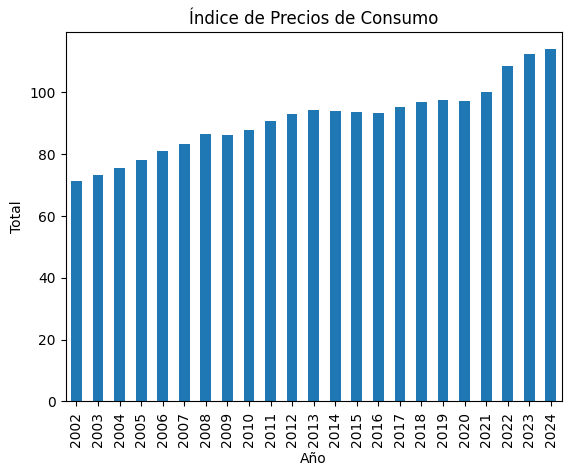

In [66]:
suma_por_ano.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Total')
plt.title('Índice de Precios de Consumo')

## Tipo de Cambio 
https://www.bde.es/webbe/es/estadisticas/temas/tipos-cambio.html

In [69]:
import requests
response = requests.get('https://www.bde.es', verify=True)
tipos_cambio = "https://www.bde.es/webbe/es/estadisticas/compartido/datos/csv/tc_1_1.csv"
# tipos_cambio = "https://www.bde.es/wbe/es/estadisticas/compartido/datos/csv/tc_1_1.csv"
tipos_cambio_destino = "C:/Users/jorge/OneDrive/Escritorio/Master/TFM/hipotecas_anuales.csv"
descargar_csv_desde_url(tipos_cambio , tipos_cambio_destino)

Archivo CSV descargado exitosamente en: C:/Users/jorge/OneDrive/Escritorio/Master/TFM/hipotecas_anuales.csv


In [72]:
columns = ['Periodo','USD', 'JPY', 'CHF', 'GBP', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17','18', '19', '20', '21', '22', '23', '24', '25','26', '27', '28', '29', '30', '31','32', '33', '34']
tipos_cambio_df = pd.read_csv(tipos_cambio_destino, sep=',', names=columns, encoding='ISO-8859-1')
tipos_cambio_df = tipos_cambio_df[['Periodo','USD', 'JPY', 'CHF', 'GBP']]
tipos_cambio_df['Año'] = tipos_cambio_df['Periodo'].str.slice(start=7, stop=11)

In [73]:
tipos_cambio_df

,Periodo,USD,JPY,CHF,GBP,Año
0,NOMBRE DE LA SERIE,DTCCBCEUSDEUR.B,DTCCBCEJPYEUR.B,DTCCBCECHFEUR.B,DTCCBCEGBPEUR.B,DE L
1,NÚMERO SECUENCIAL,573234,573220,573204,573214,SECU
2,ALIAS DE LA SERIE,TC_1_1.1,TC_1_1.2,TC_1_1.3,TC_1_1.4,E LA
3,DESCRIPCIÓN DE LA SERIE,Tipo de cambio. Dólares estadounidenses por eu...,Tipo de cambio. Yenes japoneses por euro (JPY/...,Tipo de cambio. Francos suizos por euro (CHF/E...,Tipo de cambio. Libras esterlinas por euro (GB...,CIÓN
4,DESCRIPCIÓN DE LAS UNIDADES,Dólares de Estados Unidos por Euro,Yenes japoneses por Euro,Francos suizos por Euro,Libras esterlinas por Euro,CIÓN
...,...,...,...,...,...,...
6596,08 ABR 2024,1.0823,164.4300,0.9807,0.85795,2024
6597,09 ABR 2024,1.0867,164.9700,0.9819,0.85663,2024
6598,10 ABR 2024,1.0860,164.8900,0.9810,0.85515,2024
6599,FUENTE,BANCO CENTRAL EUROPEO,BANCO CENTRAL EUROPEO,BANCO CENTRAL EUROPEO,BANCO CENTRAL EUROPEO,


In [74]:
condicion_1 = (tipos_cambio_df['Año'] == '2008')
condicion_2 = (tipos_cambio_df['Año'] == '2009')
condicion_3 = (tipos_cambio_df['Año'] == '2010')
condicion_4 = (tipos_cambio_df['Año'] == '2011')
condicion_5 = (tipos_cambio_df['Año'] == '2012')
condicion_6 = (tipos_cambio_df['Año'] == '2013')
condicion_7 = (tipos_cambio_df['Año'] == '2014')
condicion_8 = (tipos_cambio_df['Año'] == '2015')
condicion_9 = (tipos_cambio_df['Año'] == '2016')
condicion_10 = (tipos_cambio_df['Año'] == '2017')
condicion_11 = (tipos_cambio_df['Año'] == '2018')
condicion_12 = (tipos_cambio_df['Año'] == '2019')
condicion_13 = (tipos_cambio_df['Año'] == '2020')
condicion_14 = (tipos_cambio_df['Año'] == '2021')
condicion_15 = (tipos_cambio_df['Año'] == '2022')
condicion_16 = (tipos_cambio_df['Año'] == '2023')
condicion_17 = (tipos_cambio_df['Año'] == '2024')
tipos_cambio_df = tipos_cambio_df.loc[(condicion_1)|(condicion_2)|(condicion_3)|(condicion_4)|(condicion_5)|(condicion_6)|(condicion_7)|(condicion_8)|(condicion_9)|(condicion_10)|(condicion_11)|(condicion_12)|(condicion_13)|(condicion_14)|(condicion_15)|(condicion_16)|(condicion_17)]

In [75]:
tipos_cambio_df['Año'] = tipos_cambio_df['Año'].astype(int)
tipos_cambio_df['USD'] = tipos_cambio_df['USD'].replace('_', '0', regex=True)
tipos_cambio_df['USD'] = tipos_cambio_df['USD'].astype(float)
grupo = tipos_cambio_df.groupby('Año')
suma_por_ano = grupo['USD'].mean() 

C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\1607951396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tipos_cambio_df['Año'] = tipos_cambio_df['Año'].astype(int)
C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\1607951396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tipos_cambio_df['USD'] = tipos_cambio_df['USD'].replace('_', '0', regex=True)
C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\1607951396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

Text(0.5, 1.0, 'Tipo de cambio. Dólares estadounidenses por euro')

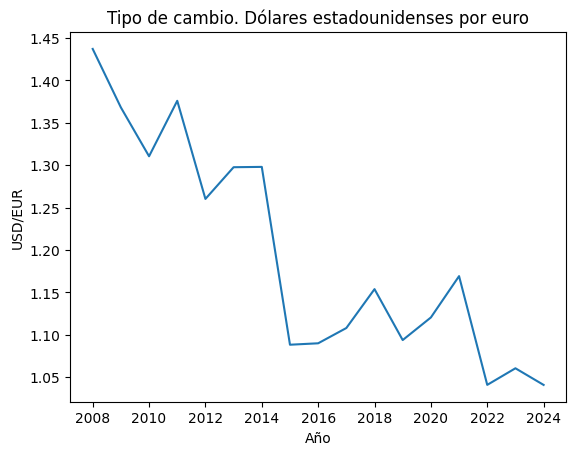

In [76]:
suma_por_ano.plot()
plt.xlabel('Año')
plt.ylabel('USD/EUR')
plt.title('Tipo de cambio. Dólares estadounidenses por euro')

In [77]:
tipos_cambio_df['JPY'] = tipos_cambio_df['JPY'].replace('_', '0', regex=True)
tipos_cambio_df['JPY'] = tipos_cambio_df['JPY'].astype(float)
grupo = tipos_cambio_df.groupby('Año')
suma_por_ano = grupo['JPY'].mean() 

C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\21920066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tipos_cambio_df['JPY'] = tipos_cambio_df['JPY'].replace('_', '0', regex=True)
C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\21920066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tipos_cambio_df['JPY'] = tipos_cambio_df['JPY'].astype(float)


Text(0.5, 1.0, 'Tipo de cambio. Yenes japoneses por euro')

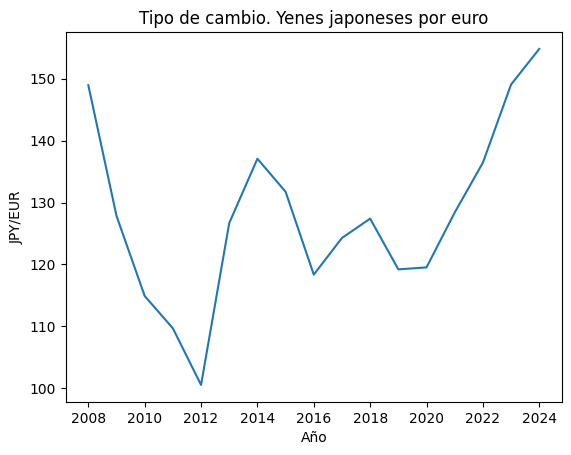

In [78]:
suma_por_ano.plot()
plt.xlabel('Año')
plt.ylabel('JPY/EUR')
plt.title('Tipo de cambio. Yenes japoneses por euro')

In [79]:
tipos_cambio_df['CHF'] = tipos_cambio_df['CHF'].replace('_', '0', regex=True)
tipos_cambio_df['CHF'] = tipos_cambio_df['CHF'].astype(float)
grupo = tipos_cambio_df.groupby('Año')
suma_por_ano = grupo['CHF'].mean() 

C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\890948278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tipos_cambio_df['CHF'] = tipos_cambio_df['CHF'].replace('_', '0', regex=True)
C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\890948278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tipos_cambio_df['CHF'] = tipos_cambio_df['CHF'].astype(float)


Text(0.5, 1.0, 'Tipo de cambio. Francos suizos por euro')

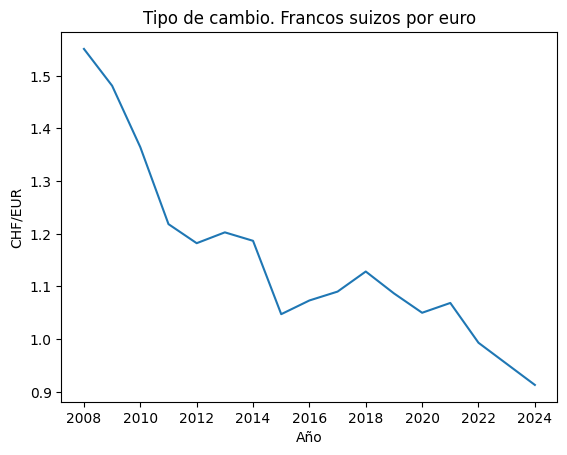

In [80]:
suma_por_ano.plot()
plt.xlabel('Año')
plt.ylabel('CHF/EUR')
plt.title('Tipo de cambio. Francos suizos por euro')

In [81]:
tipos_cambio_df['GBP'] = tipos_cambio_df['GBP'].replace('_', '0', regex=True)
tipos_cambio_df['GBP'] = tipos_cambio_df['GBP'].astype(float)
grupo = tipos_cambio_df.groupby('Año')
suma_por_ano = grupo['GBP'].mean() 

C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\1029954120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tipos_cambio_df['GBP'] = tipos_cambio_df['GBP'].replace('_', '0', regex=True)
C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\1029954120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tipos_cambio_df['GBP'] = tipos_cambio_df['GBP'].astype(float)


Text(0.5, 1.0, 'Tipo de cambio. Libras esterlinas por euro')

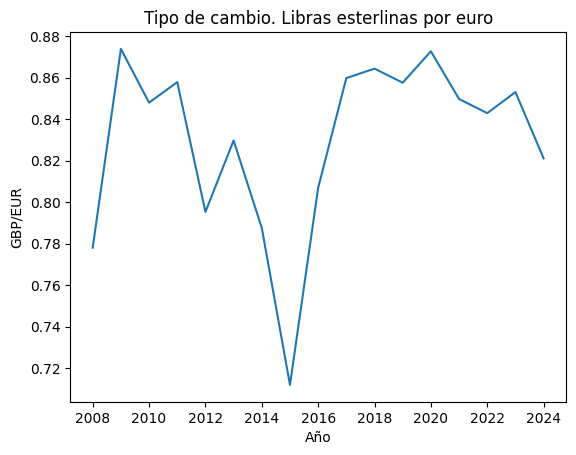

In [82]:
suma_por_ano.plot()
plt.xlabel('Año')
plt.ylabel('GBP/EUR')
plt.title('Tipo de cambio. Libras esterlinas por euro')

## Créditos al Consumo
https://www.bde.es/webbe/es/estadisticas/temas/instituciones-financieras.html

In [96]:
import requests
# URL del archivo CSV que quieres descargar
url = "https://www.bde.es/webbe/es/estadisticas/compartido/datos/csv/be0818.csv"
# Ruta local donde quieres guardar el archivo
Credito_consumo_destino = "C:\\Users\\jorge\\OneDrive\\Escritorio\\Master\\TFM\\creditos_anuales.csv"
# Realizar la petición HTTP GET para descargar el archivo
response = requests.get(url)
# Verificar que la petición fue exitosa
if response.status_code == 200:
    # Escribir el contenido al archivo de destino
    with open(Credito_consumo_destino, 'wb') as file:
        file.write(response.content)
else:
    print("Error al descargar el archivo: ", response.status_code)

In [86]:
response = requests.get('https://www.bde.es', verify=True)
Credito_consumo = "https://www.bde.es/webbe/es/estadisticas/compartido/datos/csv/be0818.csv" 
Credito_consumo_destino = "C:/Users/jorge/OneDrive/Escritorio/Master/TFM/hipotecas_anuales.csv"
descargar_csv_desde_url(Credito_consumo , Credito_consumo)

Error: [Errno 22] Invalid argument: 'https://www.bde.es/webbe/es/estadisticas/compartido/datos/csv/be0818.csv'


In [102]:
COLUMNS = ['Periodo','1', '2', '3', '4', '5','6', 'Hogares.Adq_rehab', 'Hogares.Consumo', 'Hogares.Otros', '10', '11']
Credito_consumo_df = pd.read_csv(Credito_consumo_destino, sep=',', names=COLUMNS, encoding='ISO-8859-1')

In [103]:
Credito_consumo_df['Año'] = Credito_consumo_df ['Periodo'].str.slice(start=4, stop=8)

In [104]:
Credito_consumo_df

,Periodo,1,2,3,4,5,6,Hogares.Adq_rehab,Hogares.Consumo,Hogares.Otros,10,11,Año
0,NOMBRE DE LA SERIE,DF_MESNAA20F1U62240Z01E,DF_MESNAA20I1U62240Z01E,DF_MESNAA20J1U62240Z01E,DF_MESNAA20F1U62251Z01E,DF_MESNAA20I1U62251Z01E,DF_MESNAA20J1U62251Z01E,DF_MESNAA22A1U62250Z01E,DF_MESNAA21A1U62250Z01E,DF_MESNAA23A1U62250Z01E,DF_MESNAA23A1U62253Z01E,DF_MESNAA20A1U62252Z01E,RE D
1,NÚMERO SECUENCIAL,2788915,2788916,2788917,2788918,2788919,2788920,2788921,2788922,2788923,2792860,902441,RO S
2,ALIAS DE LA SERIE,BE_8_18.1,BE_8_18.2,BE_8_18.3,BE_8_18.4,BE_8_18.5,BE_8_18.6,BE_8_18.7,BE_8_18.8,BE_8_18.9,BE_8_18.10,BE_8_18.11,S DE
3,DESCRIPCIÓN DE LA SERIE,OIFM. Balance según estados UEM. Préstamos y c...,OIFM. Balance según estados UEM. Préstamos y c...,OIFM. Balance según estados UEM. Préstamos y c...,OIFM. Balance según estados UEM. Préstamos y c...,OIFM. Balance según estados UEM. Préstamos y c...,OIFM. Balance según estados UEM. Préstamos y c...,OIFM. Balance según estados UEM. Préstamos y c...,OIFM. Balance según estados UEM. Préstamos y c...,OIFM. Balance según estados UEM. Préstamos y c...,OIFM. Balance según estados UEM. Préstamos y c...,OIFM. Balance según estados UEM. Préstamos y c...,RIPC
4,DESCRIPCIÓN DE LAS UNIDADES,Millones de Euros,Millones de Euros,Millones de Euros,Millones de Euros,Millones de Euros,Millones de Euros,Millones de Euros,Millones de Euros,Millones de Euros,Millones de Euros,Millones de Euros,RIPC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,DIC 2023,85769,122852,239241,35833,37140,592678,492466,97054,76131,36911,5013,2023
322,ENE 2024,81652,122352,237825,35341,37206,590553,490744,96411,75944,36692,4840,2024
323,FEB 2024,82091,123336,236971,34519,37434,590286,490227,96207,75805,36443,4605,2024
324,FUENTE,Banco de España,Banco de España,Banco de España,Banco de España,Banco de España,Banco de España,Banco de España,Banco de España,Banco de España,Banco de España,NaN,TE


In [105]:
condicion_1 = (Credito_consumo_df['Año'] == '2008')
condicion_2 = (Credito_consumo_df['Año'] == '2009')
condicion_3 = (Credito_consumo_df['Año'] == '2010')
condicion_4 = (Credito_consumo_df['Año'] == '2011')
condicion_5 = (Credito_consumo_df['Año'] == '2012')
condicion_6 = (Credito_consumo_df['Año'] == '2013')
condicion_7 = (Credito_consumo_df['Año'] == '2014')
condicion_8 = (Credito_consumo_df['Año'] == '2015')
condicion_9 = (Credito_consumo_df['Año'] == '2016')
condicion_10 = (Credito_consumo_df['Año'] == '2017')
condicion_11 = (Credito_consumo_df['Año'] == '2018')
condicion_12 = (Credito_consumo_df['Año'] == '2019')
condicion_13 = (Credito_consumo_df['Año'] == '2020')
condicion_14 = (Credito_consumo_df['Año'] == '2021')
condicion_15 = (Credito_consumo_df['Año'] == '2022')
condicion_16 = (Credito_consumo_df['Año'] == '2023')
condicion_17 = (Credito_consumo_df['Año'] == '2024')
Credito_consumo_df = Credito_consumo_df.loc[(condicion_1)|(condicion_2)|(condicion_3)|(condicion_4)|(condicion_5)|(condicion_6)|(condicion_7)|(condicion_8)|(condicion_9)|(condicion_10)|(condicion_11)|(condicion_12)|(condicion_13)|(condicion_14)|(condicion_15)|(condicion_16)|(condicion_17)]

In [106]:
Credito_consumo_df['Año'] = Credito_consumo_df['Año'].astype(int)
Credito_consumo_df['Hogares.Consumo'] = Credito_consumo_df['Hogares.Consumo'].astype(float)
Credito_consumo_df['Hogares.Consumo'] = Credito_consumo_df['Hogares.Consumo']*1000000
Credito_consumo_df['Hogares.Adq_rehab'] = Credito_consumo_df['Hogares.Adq_rehab'].astype(float)
Credito_consumo_df['Hogares.Adq_rehab'] = Credito_consumo_df['Hogares.Adq_rehab']*1000000
Credito_consumo_df['Hogares.Otros'] = Credito_consumo_df['Hogares.Otros'].astype(float)
Credito_consumo_df['Hogares.Otros'] = Credito_consumo_df['Hogares.Otros']*1000000

C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\821296876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Credito_consumo_df['Año'] = Credito_consumo_df['Año'].astype(int)
C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\821296876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Credito_consumo_df['Hogares.Consumo'] = Credito_consumo_df['Hogares.Consumo'].astype(float)
C:\Users\jorge\AppData\Local\Temp\ipykernel_1860\821296876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [107]:
Credito_consumo_df

,Periodo,1,2,3,4,5,6,Hogares.Adq_rehab,Hogares.Consumo,Hogares.Otros,10,11,Año
130,ENE 2008,223218,253537,422759,39996,61228,736701,6.269460e+11,1.033230e+11,1.076560e+11,_,6027,2008
131,FEB 2008,221712,255151,427031,39320,61256,742331,6.313760e+11,1.038470e+11,1.076840e+11,_,5805,2008
132,MAR 2008,225387,254701,431918,39086,61171,746799,6.350100e+11,1.038300e+11,1.082160e+11,_,5804,2008
133,ABR 2008,223999,255400,437309,39300,61275,753219,6.398750e+11,1.042210e+11,1.096970e+11,_,5833,2008
134,MAY 2008,225011,255108,441420,39796,61467,758165,6.434880e+11,1.054350e+11,1.105040e+11,_,5782,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,OCT 2023,82750,125226,238546,34493,37207,595166,4.947580e+11,9.525900e+10,7.684900e+10,37340,5109,2023
320,NOV 2023,82766,123522,239414,45646,37157,594226,4.937390e+11,9.643100e+10,8.685900e+10,37363,4977,2023
321,DIC 2023,85769,122852,239241,35833,37140,592678,4.924660e+11,9.705400e+10,7.613100e+10,36911,5013,2023
322,ENE 2024,81652,122352,237825,35341,37206,590553,4.907440e+11,9.641100e+10,7.594400e+10,36692,4840,2024


In [108]:
grupo = Credito_consumo_df.groupby('Año')
suma_por_ano = grupo['Hogares.Consumo'].sum() 

Text(0.5, 1.0, 'Hogares. Créditos al Consumo')

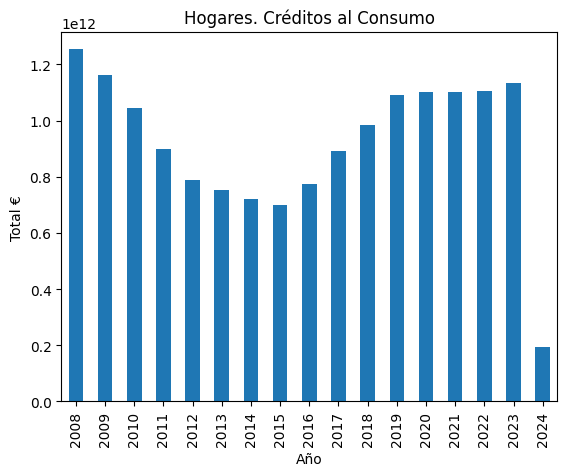

In [109]:
suma_por_ano.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Total €')
plt.title('Hogares. Créditos al Consumo')

In [110]:
grupo = Credito_consumo_df.groupby('Año')
suma_por_ano = grupo['Hogares.Adq_rehab'].sum() 

Text(0.5, 1.0, 'Hogares. Adquisición de Vivienda y rehabilitación')

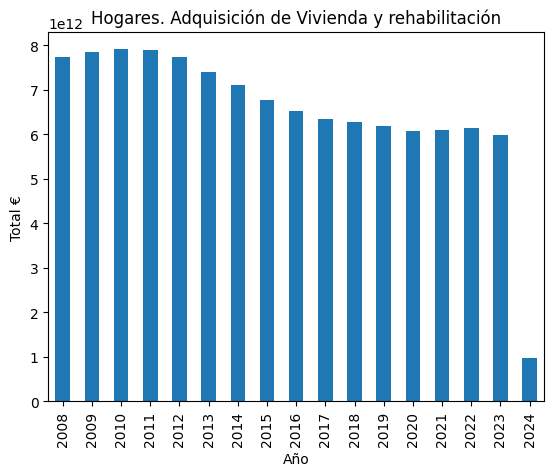

In [111]:
suma_por_ano.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Total €')
plt.title('Hogares. Adquisición de Vivienda y rehabilitación')

In [112]:
grupo = Credito_consumo_df.groupby('Año')
suma_por_ano = grupo['Hogares.Otros'].sum() 

Text(0.5, 1.0, 'Hogares. Otros')

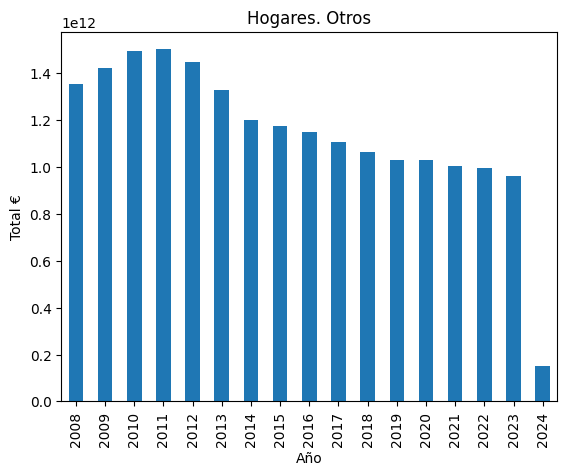

In [113]:
suma_por_ano.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Total €')
plt.title('Hogares. Otros')